In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report 

In [2]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
df.shape

(6362620, 11)

In [4]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])

In [11]:
df["type"].value_counts()

1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: type, dtype: int64

In [12]:
df["nameOrig"].head(5)

0    C1231006815
1    C1666544295
2    C1305486145
3     C840083671
4    C2048537720
Name: nameOrig, dtype: object

In [13]:
df["nameOrig"].nunique()

6353307

In [14]:
df["nameOrig"].str[0].value_counts()

C    6362620
Name: nameOrig, dtype: int64

In [15]:
df["nameDest"].str[0].value_counts()

C    4211125
M    2151495
Name: nameDest, dtype: int64

In [16]:
df["nameDest"] = df["nameDest"].str[0]

In [17]:
# df["nameDest"].str[1:]

In [18]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M,0.0,0.0,0,0


In [19]:
df.drop(columns="nameOrig" , inplace=True)

In [20]:
le2 = LabelEncoder()
df["nameDest"] = le2.fit_transform(df["nameDest"])

In [21]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,1,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,1,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,0,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,1,0.0,0.0,0,0


<Axes: xlabel='isFraud', ylabel='count'>

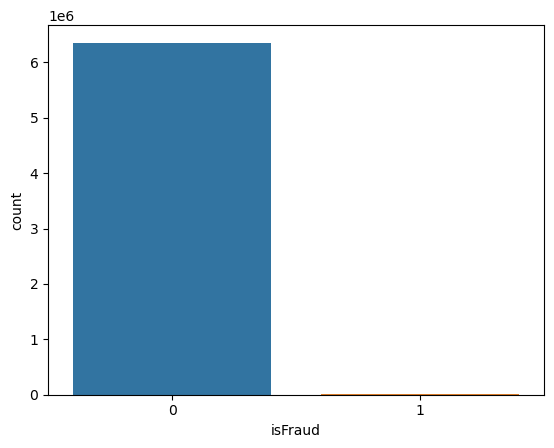

In [22]:
sns.countplot(data = df , x = 'isFraud')

In [23]:
df["isFraud"].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [24]:
x = df.drop(columns="isFraud")
y = df["isFraud"]

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=42,
                                                      train_size=.7 , stratify=y)

In [26]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,1,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,1,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0,0.00,0.00,0
3,1,1,181.00,181.00,0.00,0,21182.00,0.00,0
4,1,3,11668.14,41554.00,29885.86,1,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0,0.00,339682.13,0
6362616,743,4,6311409.28,6311409.28,0.00,0,0.00,0.00,0
6362617,743,1,6311409.28,6311409.28,0.00,0,68488.84,6379898.11,0
6362618,743,4,850002.52,850002.52,0.00,0,0.00,0.00,0


In [27]:
scaler = StandardScaler()

In [28]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale  = scaler.transform(x_test)

In [29]:
model = LogisticRegression().fit(x_train_scale , y_train)

C:\Users\AMIT\Documents\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
y_pred = model.predict(x_test_scale)

In [31]:
accuracy_score(y_test , y_pred)

0.99919896730173

In [32]:
from collections import Counter

In [33]:
Counter(y_test)

Counter({0: 1906322, 1: 2464})

In [34]:
Counter(y_pred)

Counter({0: 1907681, 1: 1105})

In [35]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.92      0.41      0.57      2464

    accuracy                           1.00   1908786
   macro avg       0.96      0.71      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786



In [36]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,1,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,1,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0,0.00,0.00,0
3,1,1,181.00,181.00,0.00,0,21182.00,0.00,0
4,1,3,11668.14,41554.00,29885.86,1,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0,0.00,339682.13,0
6362616,743,4,6311409.28,6311409.28,0.00,0,0.00,0.00,0
6362617,743,1,6311409.28,6311409.28,0.00,0,68488.84,6379898.11,0
6362618,743,4,850002.52,850002.52,0.00,0,0.00,0.00,0


In [37]:
from imblearn.over_sampling import RandomOverSampler , SMOTE
from imblearn.under_sampling import RandomUnderSampler , TomekLinks
from imblearn.combine import SMOTETomek

In [38]:
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn 
# !pip install scikit-learn==1.2.2

In [40]:
# !pip install imblearn

# OVER SAMPLER

### RandomOverSampler

In [41]:
rvs = RandomOverSampler(random_state=42)
x_res , y_res = rvs.fit_resample(x , y )

In [42]:
Counter(y)

Counter({0: 6354407, 1: 8213})

In [43]:
Counter(y_res)

Counter({0: 6354407, 1: 6354407})

In [44]:
x_res.shape

(12708814, 9)

In [45]:
x.shape

(6362620, 9)

In [47]:
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , train_size=.7 , random_state=42,
                                                      stratify=y_res)

In [48]:
scaler = StandardScaler()

In [49]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale  = scaler.transform(x_test)

In [50]:
model = LogisticRegression().fit(x_train_scale , y_train)

C:\Users\AMIT\Documents\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
y_pred = model.predict(x_test_scale)

In [52]:
accuracy_score(y_test , y_pred)

0.962067278752677

In [53]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96   1906323
           1       0.95      0.97      0.96   1906322

    accuracy                           0.96   3812645
   macro avg       0.96      0.96      0.96   3812645
weighted avg       0.96      0.96      0.96   3812645



### SMOTE

In [54]:
smt = SMOTE(random_state=42)
x_res , y_res = smt.fit_resample(x , y )

In [55]:
Counter(y)

Counter({0: 6354407, 1: 8213})

In [56]:
Counter(y_res)

Counter({0: 6354407, 1: 6354407})

In [57]:
x_res.shape

(12708814, 9)

In [58]:
x.shape

(6362620, 9)

In [59]:
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , train_size=.7 , random_state=42,
                                                      stratify=y_res)

In [60]:
scaler = StandardScaler()

In [61]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale  = scaler.transform(x_test)

In [62]:
model = LogisticRegression().fit(x_train_scale , y_train)

C:\Users\AMIT\Documents\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
y_pred = model.predict(x_test_scale)

In [64]:
accuracy_score(y_test , y_pred)

0.962913672791461

In [65]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96   1906323
           1       0.96      0.97      0.96   1906322

    accuracy                           0.96   3812645
   macro avg       0.96      0.96      0.96   3812645
weighted avg       0.96      0.96      0.96   3812645



# UNDER SAMPLE

#### RandomUnderSampler

In [66]:
rus = RandomUnderSampler(random_state=42)
x_res , y_res = rus.fit_resample(x , y )

In [67]:
Counter(y)

Counter({0: 6354407, 1: 8213})

In [68]:
Counter(y_res)

Counter({0: 8213, 1: 8213})

In [69]:
x_res.shape

(16426, 9)

In [70]:
x.shape

(6362620, 9)

In [71]:
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , train_size=.7 , random_state=42,
                                                      stratify=y_res)

In [72]:
scaler = StandardScaler()

In [73]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale  = scaler.transform(x_test)

In [74]:
model = LogisticRegression().fit(x_train_scale , y_train)

In [75]:
y_pred = model.predict(x_test_scale)

In [76]:
accuracy_score(y_test , y_pred)

0.9239042207792207

In [77]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2464
           1       0.94      0.91      0.92      2464

    accuracy                           0.92      4928
   macro avg       0.92      0.92      0.92      4928
weighted avg       0.92      0.92      0.92      4928



#### TomekLinks

In [79]:
tom = TomekLinks()
x_res , y_res = tom.fit_resample(x , y )

In [80]:
Counter(y)

Counter({0: 6354407, 1: 8213})

In [81]:
Counter(y_res)

Counter({0: 6353237, 1: 8213})

In [82]:
x_res.shape

(6361450, 9)

In [83]:
x.shape

(6362620, 9)

In [84]:
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , train_size=.7 , random_state=42,
                                                      stratify=y_res)

In [85]:
scaler = StandardScaler()

In [86]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale  = scaler.transform(x_test)

In [87]:
model = LogisticRegression().fit(x_train_scale , y_train)

In [88]:
y_pred = model.predict(x_test_scale)

In [89]:
accuracy_score(y_test , y_pred)

0.9992318313172835

In [90]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1905971
           1       0.93      0.44      0.59      2464

    accuracy                           1.00   1908435
   macro avg       0.97      0.72      0.80   1908435
weighted avg       1.00      1.00      1.00   1908435



#### SMOTETomek

In [ ]:
smttom = SMOTETomek()
x_res , y_res = smttom.fit_resample(x , y )

In [ ]:
Counter(y)

In [ ]:
Counter(y_res)

In [ ]:
x_res.shape

In [ ]:
x.shape

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , train_size=.7 , random_state=42,
                                                      stratify=y_res)

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale  = scaler.transform(x_test)

In [ ]:
model = LogisticRegression().fit(x_train_scale , y_train)

In [ ]:
y_pred = model.predict(x_test_scale)

In [ ]:
accuracy_score(y_test , y_pred)

In [ ]:
print(classification_report(y_test , y_pred))